#### Team members

1. Mostafa Allahmoradi - 9087818
2. Cemil Caglar Yapici – 9081058
3. Jarius Bedward - 8841640

# Import Libraries & Dependencies

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


#### Problem statement

Area of Focus:
In today’s world, health conditions such as heart disease, obesity, and diabetes are rapidly increasing. Many of these illnesses are directly linked to preventable lifestyle factors such as poor diet, lack of physical activity, smoking, alcohol consumption, and inadequate sleep. Despite increased awareness about healthy living, many individuals are still at risk because they underestimate how daily habits affect their well-being in long-term.

Outcome:
Early detection and prevention could save lives and reduce medical costs, but traditional screening methods are often not effective, and they typically only identify problems after symptoms appear, missing critical opportunities for prevention.

This project aims to explore how machine learning can help predict the likelihood of developing a heart condition (or general illness) based on an individual’s diet, lifestyle, and fitness-related factors. By analyzing real-world health data, our goal is to identify key risk factors and build a predictive model that can help individuals take proactive measures toward healthier living.

#### Hypothesis

Null hypothesis:

H0: Individual with composite lifestyle score (worse diet + smoking + high alcohol consumption + low activity + poor sleep) are at high risk of heart disease


Alternative hypothesis:

H1: Current smokers have higher odds of heart disease than non-smokers
Test: logistic regression coefficient for smoking; report odds ratio (O.R.) and 95% CI.

H2: Individuals with low physical activity (e.g., <150 min/week) have a higher chance of heart disease than those meeting activity guidelines.
Test: logistic regression or compare group prevalences; p-value for activity variable.

H3: Higher BMI is positively associated with heart disease risk (dose–response).
Test: regression coefficient per unit BMI and/or BMI category comparisons.

H4: A model using lifestyle and fitness variables (diet quality, physical activity, smoking, alcohol use, sleep, BMI) will predict the likelihood of heart disease occuring
Test: compare model performance (ROC-AUC, F1) for (a) single best predictor vs (b) composite score vs (c) full model.

##### Talking Point: (How Clustering Applies to the Term Project (50 Word Summary))
- Clustering helps group individuals with similar lifestyle patterns
- It can reveal natural risk groups without pre-labeled outcomes
- By using K-Means we can find hidden patterns like high and low risk lifestyle profiles which would help explain how combinations of behaviours contribute to heart disease

#### Data Source: Heart Disease Risk Factors

## 1. Load the Data sets

In [115]:
heart_disease_dataset = pd.read_csv("data/heart_disease.csv")

display(heart_disease_dataset.head(5))
display(heart_disease_dataset.info())

display(heart_disease_dataset.describe().T)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

None

,count,mean,std,min,25%,50%,75%,max
Age,9971.0,49.296259,18.193970,18.000000,34.000000,49.000000,65.000000,80.000000
Blood Pressure,9981.0,149.757740,17.572969,120.000000,134.000000,150.000000,165.000000,180.000000
Cholesterol Level,9970.0,225.425577,43.575809,150.000000,187.000000,226.000000,263.000000,300.000000
BMI,9978.0,29.077269,6.307098,18.002837,23.658075,29.079492,34.520015,39.996954
Sleep Hours,9975.0,6.991329,1.753195,4.000605,5.449866,7.003252,8.531577,9.999952
Triglyceride Level,9974.0,250.734409,87.067226,100.000000,176.000000,250.000000,326.000000,400.000000
Fasting Blood Sugar,9978.0,120.142213,23.584011,80.000000,99.000000,120.000000,141.000000,160.000000
CRP Level,9974.0,7.472201,4.340248,0.003647,3.674126,7.472164,11.255592,14.997087
Homocysteine Level,9980.0,12.456271,4.323426,5.000236,8.723334,12.409395,16.140564,19.999037


## 2. Clean the data
  basic cleaning of the data

In [116]:
#Remove leading or trailing spaces from column names
heart_disease_dataset.columns = heart_disease_dataset.columns.str.strip()

#Drop rows with missing target variable
heart_disease_dataset = heart_disease_dataset.dropna(subset=["Heart Disease Status"])

#Fill or drop missing values
heart_disease_dataset = heart_disease_dataset.fillna(heart_disease_dataset.median(numeric_only=True)) #numeric
heart_disease_dataset = heart_disease_dataset.fillna(heart_disease_dataset.mode().iloc[0]) #categorical

print("Remaining missin values: \n", heart_disease_dataset.isna().sum().sum)


Remaining missin values: 
 <bound method Series.sum of Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64>


## Step 3 Standardize Numeric Variables

- To ensure the cluster isnt dominated by features with large scales

In [117]:
#Only use numeric cols

numeric_cols = heart_disease_dataset.select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()
heart_disease_dataset_scaled = pd.DataFrame(scaler.fit_transform(heart_disease_dataset[numeric_cols]), columns=numeric_cols)

print("Data has been standardized")
heart_disease_dataset_scaled.head()

Data has been standardized


,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
0,0.369061,0.184661,-1.618712,-0.648537,0.366591,1.049660,-0.006024,1.268241,-0.015959
1,1.084657,-0.214077,1.392213,-0.611996,1.001005,-1.354031,1.564643,0.434477,1.584367
2,-0.181398,-1.353328,-0.216679,0.123523,-1.456907,1.636206,-1.194636,1.208400,-0.283696
3,-0.952040,-1.581178,1.553102,-0.785226,-0.994883,0.486115,-1.109735,1.162067,-1.503680
4,0.589244,0.925175,0.380910,-1.363683,0.022624,0.141087,1.437292,0.671158,-0.996158


## 4. Select Lifestyle features
- Uses the standardized numeric values and select the features for cluster

In [118]:


#Lifestyle features
lifestyle_features = ["Smoking", "Alcohol Consumption", "Exercise Habits", "Sleep Hours", "BMI", "Stress Level"]

#Copies the relevant cols
heart_disease_dataset_life = heart_disease_dataset[lifestyle_features].copy()

#Encode Categorical variables only
le = LabelEncoder()
for col in ['Smoking', 'Alcohol Consumption', 'Exercise Habits', 'Stress Level']:
    heart_disease_dataset_life[col] = le.fit_transform(heart_disease_dataset_life[col].astype(str))

heart_disease_dataset_life["BMI"] = heart_disease_dataset_scaled["BMI"]
heart_disease_dataset_life["Sleep Hours"] = heart_disease_dataset_scaled["Sleep Hours"]

#Check structure

heart_disease_dataset_life.head()

,Smoking,Alcohol Consumption,Exercise Habits,Sleep Hours,BMI,Stress Level
0,1,0,0,0.366591,-0.648537,2
1,0,2,0,1.001005,-0.611996,0
2,0,1,1,-1.456907,0.123523,1
3,1,1,0,-0.994883,-0.785226,0
4,1,1,1,0.022624,-1.363683,0


##### Talking Point: (Encoding Categorical)
-


## 5. Determine Optimal Number of Clusters
- Determine the optimal # of clusters using Elbow & Silhouette methods

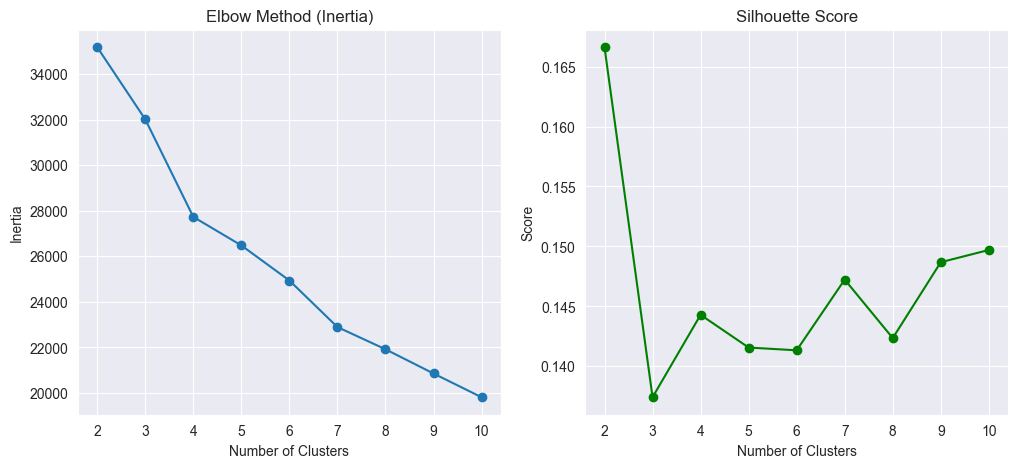

In [119]:

inertia = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(heart_disease_dataset_life)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(heart_disease_dataset_life, kmeans.labels_))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, 'o-')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(K, sil_scores, 'o-', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

##### Talking Point: (Elbow & Silhouette)

## 6. Apply K-Means Clusters with optimal k
- Choose the best k (in this case 3-5 for this data)

In [120]:
kmeans = KMeans(n_clusters=4, random_state=42)
heart_disease_dataset_life["Cluster"] = kmeans.fit_predict(heart_disease_dataset_life)

##### Talking Point (K-Means Algorithm Interpretation Summary (50 Words Summary))


## 7. Apply Cluster Profiles


In [121]:
cluster_summary = heart_disease_dataset_life.groupby("Cluster").mean().round(2)
display(cluster_summary)

print("\nCluster counts:")
print(heart_disease_dataset_life["Cluster"].value_counts())

,Smoking,Alcohol Consumption,Exercise Habits,Sleep Hours,BMI,Stress Level
Cluster,,,,,,
0,0.51,1.26,1.16,-0.88,-0.85,1.01
1,0.52,1.29,1.12,0.85,0.84,1.01
2,0.52,1.30,0.87,0.85,-0.87,0.99
3,0.51,1.21,0.82,-0.86,0.86,1.04



Cluster counts:
Cluster
1    2574
2    2483
0    2478
3    2465
Name: count, dtype: int64


## Step 8. Visualize in 2D
- We can visualize the clusters in 2D using PCA

C:\Users\jjbed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


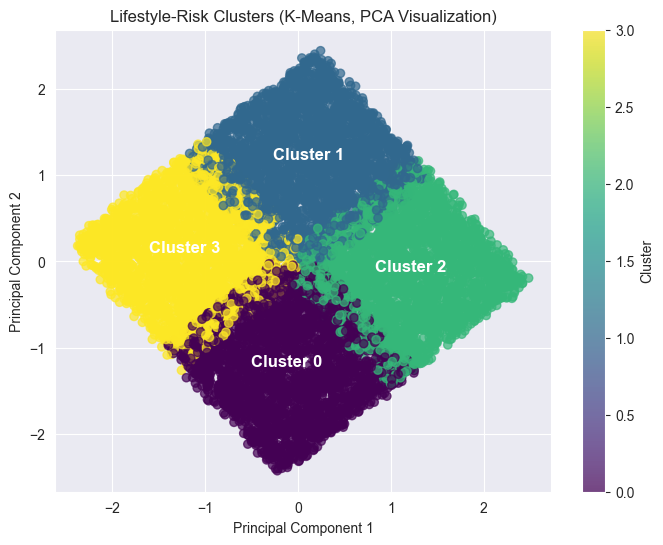


Interpretations
Cluster 0: Balanced lifestyle - Moderate BMI, healthy sleep, low alcohol/smoking.
Cluster 1: Active Lifestyle but variable stress or sleep; moderate risk
Cluster 2: Inactive lifestyle, higher BMI, poor diet; higher risk.
Cluster 3: High smoking/alcohol use, low exercise. High risk lifestyle group


In [122]:
pca = PCA(n_components=2)
features = heart_disease_dataset_life.drop(columns="Cluster") #Using pca we can transform the features into new uncorrected variables allowing us to visualize the clutters easier
pca_coords = pca.fit_transform(features)

# Fix the convert cluster centers to DF to avoid getting erorr

pca_centers = pca.transform(kmeans.cluster_centers_)

#Plot clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    pca_coords[:,0],
    pca_coords[:,1],
    c=heart_disease_dataset_life["Cluster"],
    cmap='viridis',
    alpha=0.7
)

plt.title('Lifestyle-Risk Clusters (K-Means, PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Label cluster centers
for i, (x, y) in enumerate(pca_centers):
    plt.text(x, y, f'Cluster {i}', color='white', fontsize=12, weight='bold', ha='center')

plt.colorbar(scatter, label='Cluster')
plt.show()


#Validate Cluster Means
heart_disease_dataset_life.groupby('Cluster').mean().round(2)

#Interpreations on clusters:
print("\nInterpretations")

print("Cluster 0: Balanced lifestyle - Moderate BMI, healthy sleep, low alcohol/smoking.")
print("Cluster 1: Active Lifestyle but variable stress or sleep; moderate risk")
print("Cluster 2: Inactive lifestyle, higher BMI, poor diet; higher risk.")
print("Cluster 3: High smoking/alcohol use, low exercise. High risk lifestyle group.")


##### Talking Point: (Linking Clusters to Hypothesis )